In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista
import ufl
import time
from mpi4py import MPI
from petsc4py import PETSc
import dolfinx
from dolfinx import fem, mesh, plot, nls, log, io
from dolfinx import cpp as _cpp
import meshio
import os
import sys

sys.path.append('../')
%load_ext autoreload
%autoreload 2

print(dolfinx.__version__)

0.7.2


In [2]:
from src.utils import *
from src.model import *

In [3]:
# 3D geometry

# def all(x):
#     return np.full(x.shape[1], True, dtype=bool)

with io.XDMFFile(MPI.COMM_WORLD, '../raw-data/mesh225_eroded/rve_225_eroded.xdmf', 'r') as xdmf:
    domain = xdmf.read_mesh(name='Grid')
    # cells_local = np.arange(domain.topology.index_map(domain.topology.dim).size_local, dtype=np.int32)
    # midpoints = dolfinx.mesh.compute_midpoints(domain, domain.topology.dim, cells_local).T
    # should_refine = np.flatnonzero(all(midpoints)).astype(np.int32)
    # domain.topology.create_entities(1)
    # local_edges = dolfinx.mesh.compute_incident_entities(domain, should_refine, domain.topology.dim, 1)
    # domain = dolfinx.mesh.refine(domain, local_edges)

    # edges = mesh.locate_entities(domain, domain.topology.dim - 1, all)
    # domain.topology
    # domain = mesh.refine(domain, edges)
    # V = fem.VectorFunctionSpace(domain, ('Lagrange', 2))

In [4]:
topology, cells, geometry = plot.vtk_mesh(domain, domain.topology.dim)

In [5]:
geometry.shape

(29724, 3)

In [6]:
cells.shape

(98282,)

In [7]:
topology.shape

(491410,)

In [8]:
plot_mesh(domain)

Widget(value="<iframe src='http://localhost:44135/index.html?ui=P_0x7f71c1fdb430_0&reconnect=auto' style='widt…

In [9]:
results_folder = r"../../results-data/"
exp_folder = "rve_225"

In [10]:
model = PerfusionGasExchangeModel(mesh_path=None,
                                  results_path=results_folder,
                                  exp_path=exp_folder,
                                  params=None)

In [11]:
# max_dims = [76.07255, 74.9075,  74.99651]
# min_dims = [-1.12887,  0.07919,  0.09616]

# rve_225
# max_dims = [226.4988, 225.138, 225.2962]
# min_dims = [-1.4086, 0.08677, 0.0389]

# rve_225_normal
# max_dims = [226.4988, 225.1387, 225.2962]
# min_dims = [-1.4082, 0.0866, 0.03899]

# mesh225_dilated
# max_dims = [226.3880, 224.8622, 225.0170]
# min_dims = [-1.14634, -0.0851, 0.2545]

# mesh225_eroded
max_dims = [226.01744, 224.76256, 224.7918]
min_dims = [-1.2616, 0.4544, 0.2872]

model.Setup(domain, atol = 1E-3, max_dims = max_dims, min_dims = min_dims, imported=True)
model.parameter_setup()

max_dims = [226.01744, 224.76256, 224.7918]
min_dims = [-1.2616, 0.4544, 0.2872]


In [12]:
p, u = model.Perfusion(domain, plot=True, save=True)

Problem instanced.


Error: error code 55
[0] KSPSolve() line 1085 in ./src/ksp/ksp/interface/itfunc.c
[0] KSPSolve_Private() line 850 in ./src/ksp/ksp/interface/itfunc.c
[0] KSPSetUp() line 406 in ./src/ksp/ksp/interface/itfunc.c
[0] PCSetUp() line 1017 in ./src/ksp/pc/interface/precon.c
[0] PCSetUp_LU() line 94 in ./src/ksp/pc/impls/factor/lu/lu.c
[0] MatLUFactorSymbolic() line 3140 in ./src/mat/interface/matrix.c
[0] MatLUFactorSymbolic_SeqAIJ() line 352 in ./src/mat/impls/aij/seq/aijfact.c
[0] PetscFreeSpaceGet() line 11 in ./src/mat/utils/freespace.c
[0] PetscMallocA() line 416 in ./src/sys/memory/mal.c
[0] PetscFreeSpaceGet() line 11 in ./src/mat/utils/freespace.c
[0] Out of memory. Allocated: 0, Used by process: 526807040
[0] Memory requested 5958348448

In [ ]:
model.results_path

'../../results-data/rve_test'

In [ ]:
p_val = 0
guess = model.GasExchange(domain, guess=None, save=False, 
                          plot=False, p_val = p_val, 
                          postprocess=False, plot_lines=False)
N = 10
for i in range(N):
    p_val += 1/N
    if i != N-1:
        guess = model.GasExchange(domain, guess=guess, save=False, 
                                  plot=False, p_val = p_val, 
                                  postprocess=False, plot_lines=False)
    else:
        guess = model.GasExchange(domain, guess=guess, save=True, 
                                  plot=False, p_val = p_val, 
                                  postprocess=True, plot_lines=False)

2024-01-09 03:53:16.816 (  11.585s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:16.855 (  11.623s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:16.879 (  11.647s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.78133e-12 (tol = 1e-08) r (rel) = 6.74188e-16(tol = 1e-08)
2024-01-09 03:53:16.879 (  11.647s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.1


2024-01-09 03:53:17.130 (  11.898s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:17.294 (  12.062s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:17.339 (  12.107s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 107.418 (tol = 1e-08) r (rel) = 0.15953(tol = 1e-08)
2024-01-09 03:53:17.450 (  12.218s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:17.499 (  12.267s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 15.2096 (tol = 1e-08) r (rel) = 0.0225882(tol = 1e-08)
2024-01-09 03:53:17.614 (  12.382s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:17.661 (  12.429s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 6 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.2


2024-01-09 03:53:18.227 (  12.995s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:18.394 (  13.162s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:18.449 (  13.217s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 20.9798 (tol = 1e-08) r (rel) = 0.0576066(tol = 1e-08)
2024-01-09 03:53:18.571 (  13.339s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:18.618 (  13.386s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.394508 (tol = 1e-08) r (rel) = 0.00108325(tol = 1e-08)
2024-01-09 03:53:18.749 (  13.517s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:18.806 (  13.574s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.30000000000000004


2024-01-09 03:53:19.230 (  13.998s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:19.412 (  14.180s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:19.463 (  14.231s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 12.8796 (tol = 1e-08) r (rel) = 0.0462178(tol = 1e-08)
2024-01-09 03:53:19.595 (  14.363s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:19.649 (  14.417s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.132447 (tol = 1e-08) r (rel) = 0.00047528(tol = 1e-08)
2024-01-09 03:53:19.782 (  14.551s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:19.839 (  14.607s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.4


2024-01-09 03:53:20.247 (  15.015s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:20.424 (  15.192s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:20.471 (  15.239s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 9.3912 (tol = 1e-08) r (rel) = 0.0407771(tol = 1e-08)
2024-01-09 03:53:20.594 (  15.362s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:20.648 (  15.416s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0357886 (tol = 1e-08) r (rel) = 0.000155396(tol = 1e-08)
2024-01-09 03:53:20.764 (  15.532s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:20.811 (  15.580s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-01-09 03:53:21.217 (  15.985s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:21.406 (  16.174s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:21.463 (  16.231s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 6.97129 (tol = 1e-08) r (rel) = 0.0346766(tol = 1e-08)
2024-01-09 03:53:21.576 (  16.344s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:21.626 (  16.394s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0166979 (tol = 1e-08) r (rel) = 8.30589e-05(tol = 1e-08)
2024-01-09 03:53:21.746 (  16.514s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:21.795 (  16.563s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 4 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.6


2024-01-09 03:53:22.036 (  16.804s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:22.206 (  16.974s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:22.252 (  17.020s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 5.18066 (tol = 1e-08) r (rel) = 0.0284001(tol = 1e-08)
2024-01-09 03:53:22.365 (  17.133s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:22.416 (  17.184s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.00817263 (tol = 1e-08) r (rel) = 4.4802e-05(tol = 1e-08)
2024-01-09 03:53:22.552 (  17.320s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:22.601 (  17.369s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 4 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.7


2024-01-09 03:53:22.901 (  17.669s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:23.082 (  17.850s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:23.139 (  17.907s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.11031 (tol = 1e-08) r (rel) = 0.0242386(tol = 1e-08)
2024-01-09 03:53:23.265 (  18.033s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:23.317 (  18.085s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.00481286 (tol = 1e-08) r (rel) = 2.83816e-05(tol = 1e-08)
2024-01-09 03:53:23.451 (  18.219s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:23.502 (  18.270s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iter

Problem solved in 4 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.7999999999999999


2024-01-09 03:53:23.782 (  18.550s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:23.967 (  18.735s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:24.020 (  18.789s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.55315 (tol = 1e-08) r (rel) = 0.0222074(tol = 1e-08)
2024-01-09 03:53:24.143 (  18.911s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:24.194 (  18.962s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.00388531 (tol = 1e-08) r (rel) = 2.42834e-05(tol = 1e-08)
2024-01-09 03:53:24.314 (  19.083s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:24.364 (  19.132s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iter

Problem solved in 4 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.8999999999999999


2024-01-09 03:53:24.599 (  19.367s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:24.772 (  19.540s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:24.821 (  19.589s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.2193 (tol = 1e-08) r (rel) = 0.0211033(tol = 1e-08)
2024-01-09 03:53:24.943 (  19.711s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:24.988 (  19.756s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.00414683 (tol = 1e-08) r (rel) = 2.71835e-05(tol = 1e-08)
2024-01-09 03:53:25.104 (  19.872s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:25.156 (  19.924s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 4 iterations.
Starting nonlinear problem with previous guess.
p_val = 0.9999999999999999


2024-01-09 03:53:25.408 (  20.176s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:25.573 (  20.341s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:25.620 (  20.388s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.93272 (tol = 1e-08) r (rel) = 0.019991(tol = 1e-08)
2024-01-09 03:53:25.738 (  20.506s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:25.790 (  20.558s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.00450513 (tol = 1e-08) r (rel) = 3.07094e-05(tol = 1e-08)
2024-01-09 03:53:25.906 (  20.674s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-01-09 03:53:25.957 (  20.725s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 4 iterations.
Folder did not exist, created.
Starting postprocessing.


2024-01-09 03:53:25.957 (  20.725s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 4 iterations and 4 linear solver iterations.


MemoryError: Unable to allocate 11.5 GiB for an array with shape (39304, 39304) and data type float64

In [13]:
def inlet(x):
    return np.isclose(x[0], model.min_dims[0], atol=model.atol)
def outlet(x):
    return np.isclose(x[0], model.max_dims[0], atol=model.atol)
def all(x):
    return np.full(x.shape[1], True, dtype=bool)
def both(x):
    return np.logical_or(inlet(x), outlet(x))

In [14]:
inlet_facets = mesh.locate_entities_boundary(domain, model.fdim, inlet)
outlet_facets = mesh.locate_entities_boundary(domain, model.fdim, outlet)
all_facets = mesh.locate_entities_boundary(domain, model.fdim, all)
both_facets = mesh.locate_entities_boundary(domain, model.fdim, both)
air_facets = np.setdiff1d(all_facets, both_facets)

2024-01-13 16:59:29.844 (  66.797s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 3
2024-01-13 16:59:29.850 (  66.803s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 0
2024-01-13 16:59:29.850 (  66.803s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 2
2024-01-13 16:59:29.868 (  66.821s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 0 - 3
2024-01-13 16:59:29.868 (  66.821s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 3 - 0
2024-01-13 16:59:29.882 (  66.835s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 3
2024-01-13 16:59:29.883 (  66.836s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 0
2024-01-13 16:59:29.883 (  66.836s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 2
2024-01-13 16:59:29.890 (  66.843s) [mai

In [15]:
inlet_facets

array([  1291,   1296,   1306,   1355,   1356,   1851,   1856,   1910,
         1913,   2022,   2029,   2058,   2065,   2306,   2310,   2315,
         2325,   2466,   2468,  26243,  26244,  26275,  26276,  26398,
        26403,  26408,  26417,  26427,  26429,  26561,  26616,  26617,
        26618,  27695,  27700,  27704,  28183,  28188,  28197,  28217,
        28224,  28418,  28426,  28428,  28655,  29409,  29437,  29439,
        29848,  29849,  30350,  30368,  30439,  30443,  30449,  31610,
        33606,  33613,  34114,  34115,  34365,  34845,  34847,  34935,
        35110,  35917,  37129,  37233,  37766,  37796,  38422,  38429,
        38434,  38610,  38613,  38614,  39081,  39087,  40049,  40293,
        40449,  40452,  41828,  41832,  42427,  42428,  43721,  43728,
        43801,  43802,  43808,  43809,  43816,  43819,  44057,  44058,
        44334,  44338,  44339,  45497,  45593,  45731,  45735,  46094,
        46096,  46177,  46487,  47197,  47268,  47381,  47395,  47399,
      

In [16]:
# Filter out ghosted cells
num_cells_local = mesh.locate_entities_boundary(domain, model.fdim, all)
print(f"num_cells_local = {num_cells_local}")
marker = np.zeros(np.max(num_cells_local)+1, dtype=np.int32) 
marker[inlet_facets] = 0 
marker[outlet_facets] = 50
marker[air_facets] = 100

topology, cell_types, x = dolfinx.plot.vtk_mesh(domain, model.fdim, np.arange(np.max(num_cells_local)+1, dtype=np.int32))

p = pyvista.Plotter(window_size=[800, 800])
grid = pyvista.UnstructuredGrid(topology, cell_types, x)
grid.cell_data["Marker"] = marker
grid.set_active_scalars("Marker")
p.add_mesh(grid, show_edges=False)
if pyvista.OFF_SCREEN:
    figure = p.screenshot("subdomains_structured.png")
p.show()

2024-01-13 16:59:38.547 (  75.500s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 3
2024-01-13 16:59:38.548 (  75.501s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 0
2024-01-13 16:59:38.548 (  75.501s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 2
2024-01-13 16:59:38.554 (  75.507s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 0 - 3
2024-01-13 16:59:38.554 (  75.507s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 3 - 0
2024-01-13 16:59:38.561 (  75.514s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 3
2024-01-13 16:59:38.561 (  75.514s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 2 - 0
2024-01-13 16:59:38.561 (  75.514s) [main            ]topologycomputation.cpp:776   INFO| Requesting connectivity 3 - 0


num_cells_local = [     0      1      3 ... 221187 221188 221189]


Widget(value="<iframe src='http://localhost:44135/index.html?ui=P_0x7f71633738e0_0&reconnect=auto' style='widt…

[ 2.26153874e+02  2.24987119e+02  2.22665580e+02  2.19213080e+02
  2.14665047e+02  2.09068149e+02  2.02479818e+02  1.94967659e+02
  1.86608757e+02  1.77488886e+02  1.67701628e+02  1.57347414e+02
  1.46532492e+02  1.35367837e+02  1.23968013e+02  1.12450000e+02
  1.00931987e+02  8.95321635e+01  7.83675084e+01  6.75525859e+01
  5.71983716e+01  4.74111137e+01  3.82912428e+01  2.99323412e+01
  2.24201823e+01  1.58318513e+01  1.02349532e+01  5.68691976e+00
  2.23442002e+00 -8.71187248e-02 -1.25387434e+00]


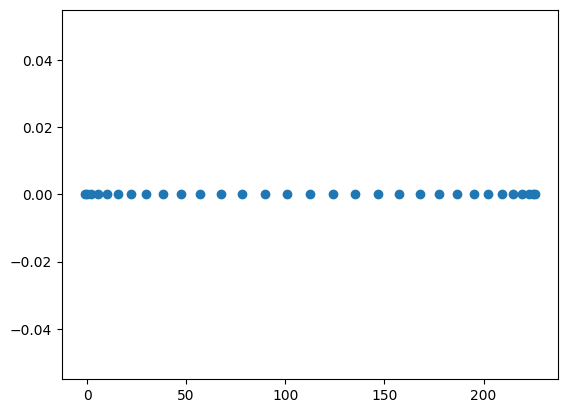

In [39]:
# Chebyshev nodes for slicing

NN = 31
b = 226.3
a = -1.4

xs = []
for i in range(1,NN+1):
    xs.append(0.5*(a+b)+0.5*(b-a)*np.cos( ((2*i-1) * np.pi) / (2*NN)))

xs = np.array(xs)
print(xs)

plt.scatter(xs, np.zeros_like(xs))
# plt.scatter(a, 0, color='red')
# plt.scatter(b, 0, color='red')
# 

In [40]:
with np.printoptions(precision=3, suppress=True):
    print(np.median(xs))
    print(xs - np.median(xs))

112.45
[ 113.704  112.537  110.216  106.763  102.215   96.618   90.03    82.518
   74.159   65.039   55.252   44.897   34.082   22.918   11.518    0.
  -11.518  -22.918  -34.082  -44.897  -55.252  -65.039  -74.159  -82.518
  -90.03   -96.618 -102.215 -106.763 -110.216 -112.537 -113.704]
